In [2]:
import numpy as np 
from helpers import * 
from implementations import *
from utilities import *
import matplotlib.pyplot as plt

In [24]:
# hyperparameter tuning with only a part of the dataset
MAX_ROWS = 10000

x_data = np.genfromtxt('data/x_train.csv', delimiter=",", skip_header=1, max_rows=MAX_ROWS)
y_data = np.genfromtxt('data/y_train.csv', delimiter=",", skip_header=1, max_rows=MAX_ROWS)

In [20]:
# choose which type of cleaning is the best

x_train = clean_X_0(x_data)  # replace nan with zero add bias column
y_train = clean_Y(y_data)

accuracy_zeros, f1_score_zeros = k_fold_cross_validation(x_train, y_train, logistic_regression, k= 5,
                                             model_params={'initial_w': np.random.rand(x_train.shape[1]),'max_iters': 5000, 'gamma':0.25})

print(f'nan -> 0 f1-score : {f1_score_zeros}, accuracy {accuracy_zeros}')

x_train = clean_X_median(x_data)  # replace nan with median add bias column

accuracy_median, f1_score_median = k_fold_cross_validation(x_train, y_train, logistic_regression, k= 5,
                                                model_params={'initial_w': np.random.rand(x_train.shape[1]),'max_iters': 5000, 'gamma':0.25})

print(f'nan -> median f1-score :{f1_score_median}, accuracy {accuracy_median}')


x_train = clean_X_mean(x_data)  # replace nan with mean add bias column

accuracy_mean, f1_score_mean = k_fold_cross_validation(x_train, y_train, logistic_regression, k= 5,
                                                model_params={'initial_w': np.random.rand(x_train.shape[1]), 'max_iters': 5000, 'gamma':0.25})

print(f'nan -> mean f1-score :{f1_score_mean}, accuracy {accuracy_mean}')



/home/stefano/Documents/EPFL/projects/ML_project_1/implementations.py:136: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/home/stefano/Documents/EPFL/projects/ML_project_1/implementations.py:136: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))


nan -> 0 f1-score : 0.28343584451324383, accuracy 0.857
nan -> median f1-score :0.26511857134839767, accuracy 0.7030000000000001
nan -> mean f1-score :0.31173022121614535, accuracy 0.851


In [45]:

# feature selection

x_train = reduced_data(x_data, 0.9)
x_train = clean_X_median(x_train)  # replace nan with zero add bias column
y_train = clean_Y(y_data)

accuracy, f1_score = k_fold_cross_validation(x_train, y_train, logistic_regression, k= 5,
                                                model_params={'initial_w': np.random.rand(x_train.shape[1]), 'max_iters': 5000, 'gamma':0.25})

print(f'without sparse column f1-score :{f1_score}, accuracy {accuracy}')


x_train = drop_highly_correlated_features(x_data)
x_train = clean_X_median(x_train)  # replace nan with zero add bias column
y_train = clean_Y(y_data)

accuracy, f1_score = k_fold_cross_validation(x_train, y_train, logistic_regression, k= 5,
                                                model_params={'initial_w': np.random.rand(x_train.shape[1]), 'max_iters': 5000, 'gamma':0.25})

print(f'without correlated column f1-score :{f1_score}, accuracy {accuracy}')


x_train = clean_X_median(x_data)  # replace nan with zero add bias column
y_train = clean_Y(y_data)

accuracy, f1_score = k_fold_cross_validation(x_train, y_train, logistic_regression, k= 5,
                                                model_params={'initial_w': np.random.rand(x_train.shape[1]), 'max_iters': 5000, 'gamma':0.25})

print(f'with sparse columns f1-score :{f1_score}, accuracy {accuracy}')

without sparse column f1-score :0.3776743101772099, accuracy 0.8688
without correlated column f1-score :0.37720079127937944, accuracy 0.8744
with sparse columns f1-score :0.38214614915496914, accuracy 0.8720000000000001


In [50]:
x_train = clean_X_median(normalize(x_data))  # replace nan with zero add bias column
y_train = clean_Y(y_data)

accuracy, f1_score = k_fold_cross_validation(x_train, y_train, logistic_regression, k= 5,
                                                model_params={'initial_w': np.random.rand(x_train.shape[1]), 'max_iters': 5000, 'gamma':0.25})

print(f'with sparse columns f1-score :{f1_score}, accuracy {accuracy}')


accuracy, f1_score = k_fold_cross_validation(x_train, y_train, reg_logistic_regression_batch, k= 5,
                                                model_params={'initial_w': np.random.rand(x_train.shape[1]),
                                                            'max_iters': 20000, 'gamma':0.25, 'lambda_': 0, 'batch_size' : 500}, threshold=0.5)


print(f'with sparse columns f1-score :{f1_score}, accuracy {accuracy}')

with sparse columns f1-score :0.3776482711082799, accuracy 0.8695
with sparse columns f1-score :0.29756588932865186, accuracy 0.8036999999999999


In [58]:
x_train = clean_X_mean(normalize(x_data))  
y_train = clean_Y(y_data)

initial_w = np.random.rand(x_train.shape[1])



best_param_lambda, best_param_gamma, best_param_threshold, best_batch_size = hyperparameter_tuning(x_train, y_train , 
                                            reg_logistic_regression, lambdas= [0, 1e-4, 1e-5], gammas=[0.15, 0.2, 0.25, 0.3, 0.35], 
                                            model_params={'initial_w': initial_w ,'max_iters': 5000})


best_param_lambda, best_param_gamma

# lambda = 1e-4 gamma = 0.25


/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))


 lambda= 0, gamma= 0.15, CV accuracy = 0.9110, f1_score = 0.2743
 lambda= 0.0001, gamma= 0.15, CV accuracy = 0.9130, f1_score = 0.2833
 lambda= 1e-05, gamma= 0.15, CV accuracy = 0.9134, f1_score = 0.2802


KeyboardInterrupt: 

In [28]:
# finding best threshold make it more likely to predict 

accuracies = []
f1_scores = []

x_train, x_test, y_train, y_test = split_data(x_data, y_data, 0.8)
x_train = (clean_X_0(x_train))
y_train = clean_Y(y_train)
x_test = (clean_X_0(x_test))
y_test = clean_Y(y_test)

initial_w  = np.random.rand(x_train.shape[1])

w, loss = reg_logistic_regression(y_train.reshape(-1, 1), x_train, initial_w=initial_w.reshape(-1, 1),lambda_= 1e-4, max_iters=5000, gamma=0.25) 


/home/stefano/Documents/EPFL/projects/ML_project_1/implementations.py:136: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/home/stefano/Documents/EPFL/projects/ML_project_1/implementations.py:136: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))


In [31]:
y_pred = predict_logistic(x_test, w, 0.3)
np.mean(y_pred == y_test), compute_f1(y_test, y_pred)

(0.8915, 0.3483483483483484)

[0.3274853801169591, 0.32923076923076927, 0.3279220779220779, 0.32653061224489793, 0.326241134751773, 0.3339587242026266, 0.33852140077821014, 0.3467741935483871, 0.3445378151260504, 0.34649122807017546, 0.35, 0.3451536643026004, 0.34466019417475735, 0.3458646616541353, 0.34108527131782945, 0.33062330623306235, 0.33519553072625696, 0.33898305084745767, 0.3488372093023256, 0.34705882352941175, 0.3483483483483484, 0.3435582822085889, 0.3522012578616352, 0.3503184713375796, 0.34527687296416937, 0.3443708609271523, 0.32432432432432434, 0.31141868512110726, 0.31690140845070425, 0.3131672597864769, 0.31386861313868614, 0.31226765799256506, 0.3106060606060606, 0.3, 0.30350194552529186, 0.2948207171314741, 0.2775510204081633, 0.2644628099173554, 0.2521008403361345, 0.24786324786324784, 0.24347826086956523, 0.23580786026200873, 0.22321428571428573, 0.22321428571428573, 0.22321428571428573, 0.21818181818181817, 0.22222222222222218, 0.205607476635514, 0.205607476635514, 0.19811320754716982, 0.190

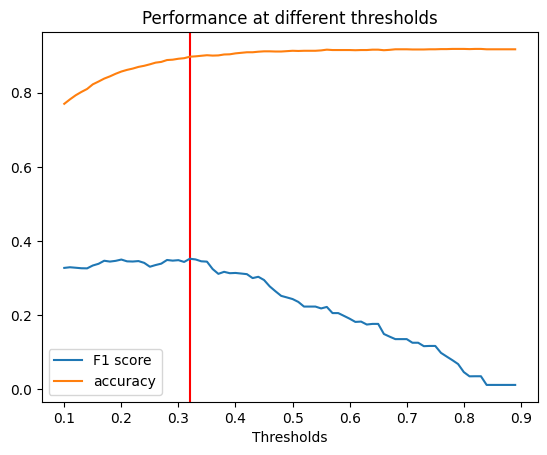

In [30]:
thresholds = np.arange(0.1, 0.9, 0.01)

f1_scores = []
accuracies = []

for t in thresholds:
    y_pred = predict_logistic(x_test, w, t)
    accuracy = np.mean(y_pred == y_test)
    f1 = compute_f1(y_test, y_pred)
    accuracies.append(accuracy)
    f1_scores.append(f1)

print(f1_scores)
max_f1_score = max(f1_scores)

f1_score_pos = np.where(max_f1_score == (f1_scores))
threshold_max = thresholds[f1_score_pos[0][0]]
print('best threshodl = ', threshold_max)

# plt.scatter(threshold_max, max_f1_score, color='red', s=100, zorder=5)
plt.axvline(x=threshold_max, color = 'red')
plt.plot(thresholds, f1_scores, label ='F1 score')
plt.plot(thresholds, accuracies, label='accuracy')
plt.xlabel('Thresholds')
plt.title('Performance at different thresholds')
plt.legend()
plt.savefig('bestf1_score.png')
plt.show()

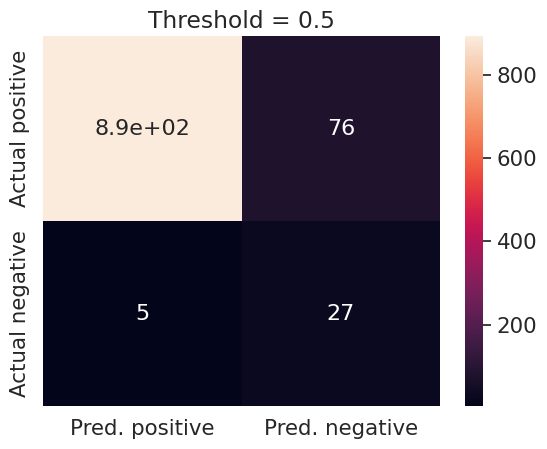

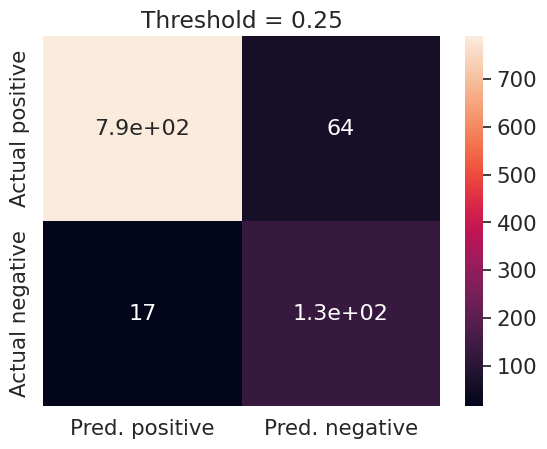

In [108]:

import seaborn as sn
import pandas as pd # just for plotting
import matplotlib.pyplot as plt


TP, FP, TN, FN = calculate_metrics(y_test, predict_logistic(x_train, w, 0.5))

array = [[ TN, FN],[TP, FP]]

df_cm = pd.DataFrame(array, ['Actual positive', 'Actual negative'], ['Pred. positive', 'Pred. negative'])
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.title('Threshold = 0.5')
plt.savefig('0.5threshold.png')
plt.show()

TP, FP, TN, FN = calculate_metrics(y_test, predict_logistic(x_train, w, 0.2))

array = [[ TN, FN],[TP, FP]]

df_cm = pd.DataFrame(array, ['Actual positive', 'Actual negative'], ['Pred. positive', 'Pred. negative'])
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
plt.title('Threshold = 0.25')
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.savefig('0.2threshold.png')
plt.show()

In [13]:
# load dataset for final training and prediction on test set

x_data = np.genfromtxt('data/dataset/x_trabin.csv', delimiter=",", skip_header=1)
y_data = np.genfromtxt('data/dataset/y_train.csv', delimiter=",", skip_header=1)
x_test = np.genfromtxt('data/dataset/x_test.csv', delimiter=",", skip_header=1)


y_data = clean_Y(y_data)
x_data = clean_X_0(x_data)
x_data, cols = drop_highly_correlated_features(x_data)

x_test_clean = clean_X_0(x_test)
x_test_clean = drop_test_correlated_features(x_test, cols)


initial_w = np.random.rand(x_data.shape[1])

# train with optimal hyperparameters
w, loss = reg_logistic_regression_batch(y_data.reshape(-1, 1), x_data,  initial_w.reshape(-1, 1), best_param_lambda , 10000, best_param_gamma, best_batch_size) 


# predict with optimal threshold
y_pred = (sigmoid(x_test_clean @ w) >= best_param_threshold).flatten() 
y_pred = np.where(y_pred, 1, -1)

create_csv_submission(x_test[:, 0], y_pred, 'prediction.csv')

/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/home/stefano/Documents/EPFL/ML_course_projects/ML_project_1/implementations.py:136: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y * np.log(sigmoids) + (1 - y) * np.log(1 - sigmoids))
/tmp/ipykernel_13652/1308123902.py:26: RuntimeWarning: invalid value encountered in double_scalars
  if len(losses) > 2 and np.abs(losses[-2] - losses[-1]) < 1e-3 and not half:
/tmp/ipykernel_13652/1308123902.py:29: RuntimeWarning: invalid value encountered in double_scalars
  elif len(losses) > 2 and np.abs(losses[-2] - losses[-1]) < 1e-5:
